In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#read file
df = pd.read_csv('Telco.csv')


In [2]:
#duplicate data
duplicates = df[df.duplicated('customerID', keep=False)]

if not duplicates.empty:
    print(duplicates)
else:
    print("no duplicate")

no duplicate


In [3]:
#missing value
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
#remove tenure = 0
print(df.shape)
df = df[df['tenure'] != 0]
print(df.shape)

(7043, 21)
(7032, 21)


In [5]:
#find unique value in each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique(dropna=False)}")
    print(df[col].value_counts(dropna=False))


Column: customerID
Number of unique values: 7032
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64

Column: gender
Number of unique values: 2
gender
Male      3549
Female    3483
Name: count, dtype: int64

Column: SeniorCitizen
Number of unique values: 2
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Column: Partner
Number of unique values: 2
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Column: Dependents
Number of unique values: 2
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Column: tenure
Number of unique values: 72
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Column: PhoneService
Number of unique values: 2
PhoneService
Yes    6352
No      680
Name: count,

In [6]:
#convert numerical form
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#outlier
def outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in columns:
    outliers, lower, upper = outlier(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Number of outliers: {outliers.shape[0]}")



Column: tenure
Lower Bound: -60.00, Upper Bound: 124.00
Number of outliers: 0

Column: MonthlyCharges
Lower Bound: -45.82, Upper Bound: 171.27
Number of outliers: 0

Column: TotalCharges
Lower Bound: -4688.48, Upper Bound: 8884.67
Number of outliers: 0


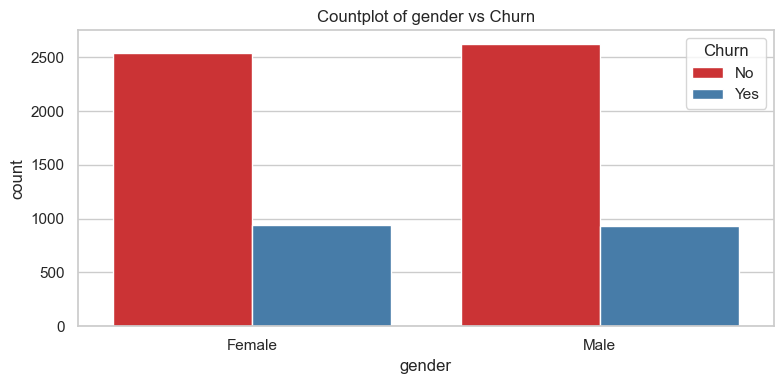

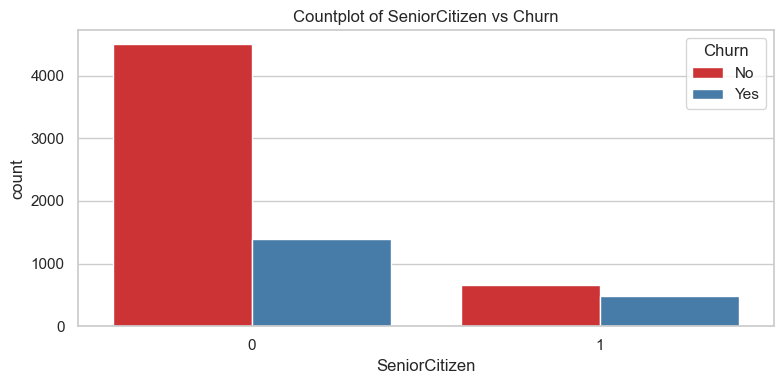

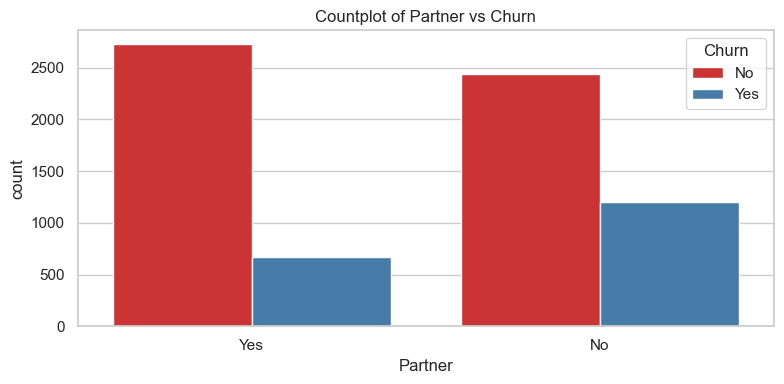

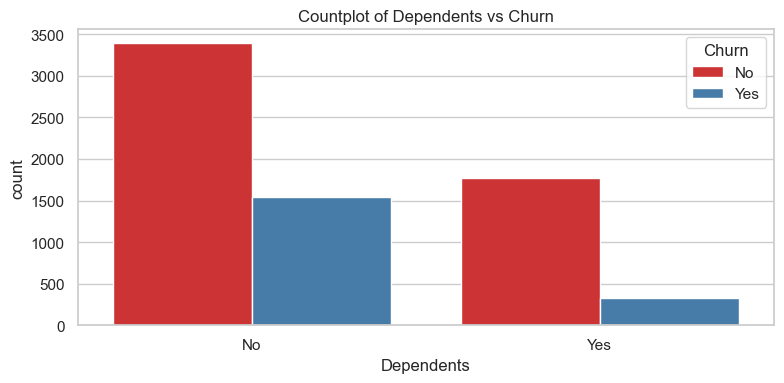

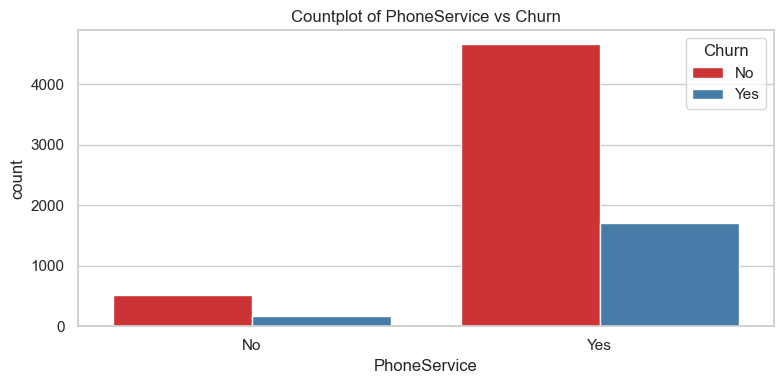

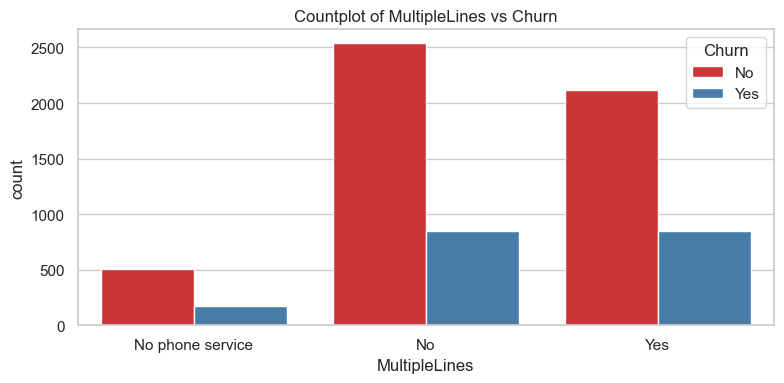

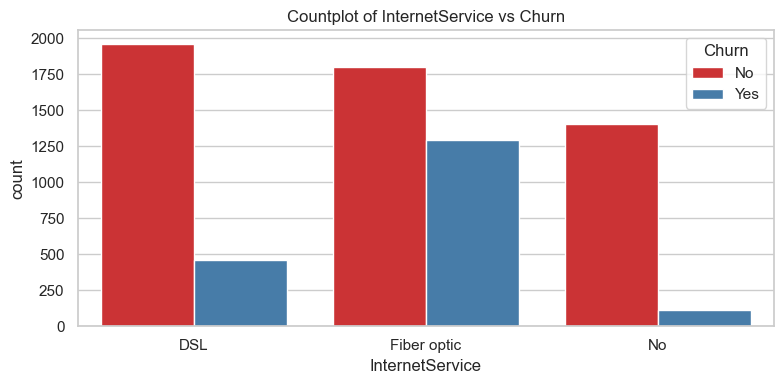

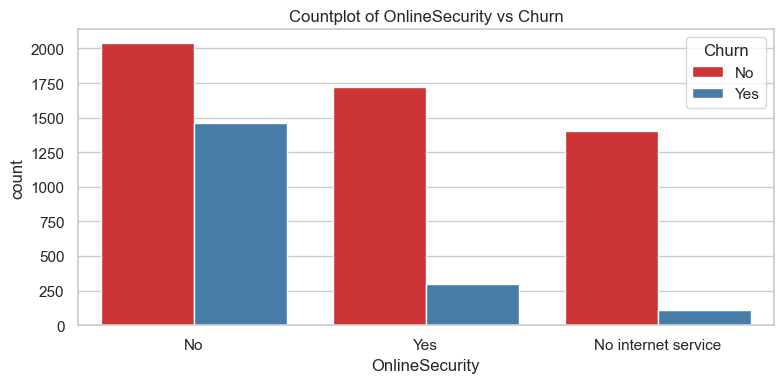

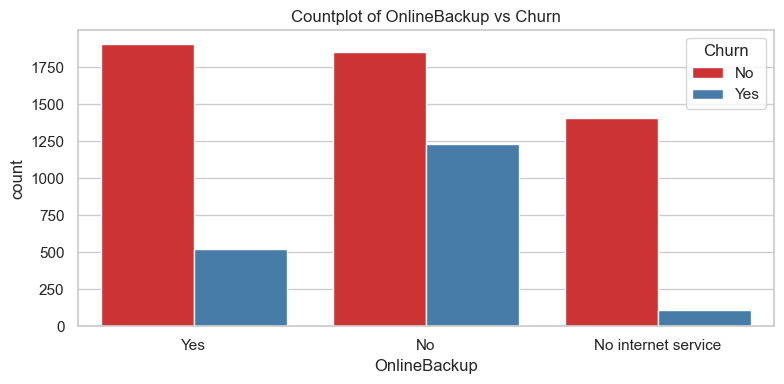

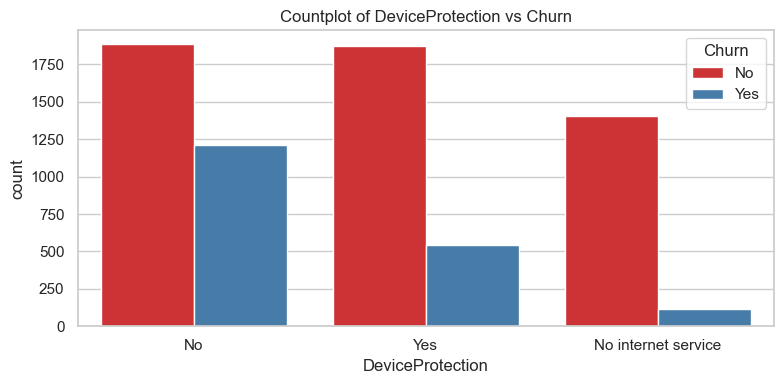

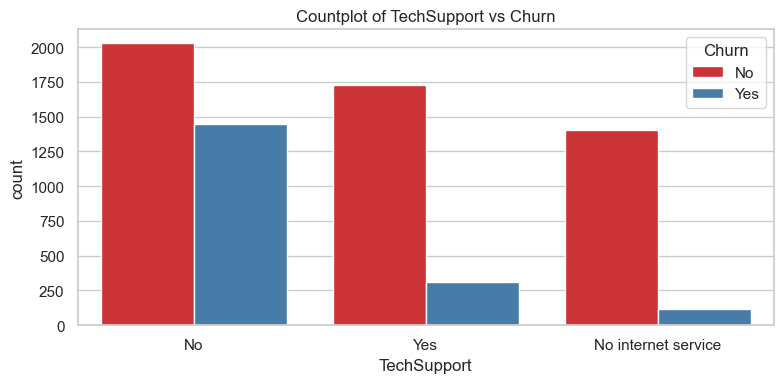

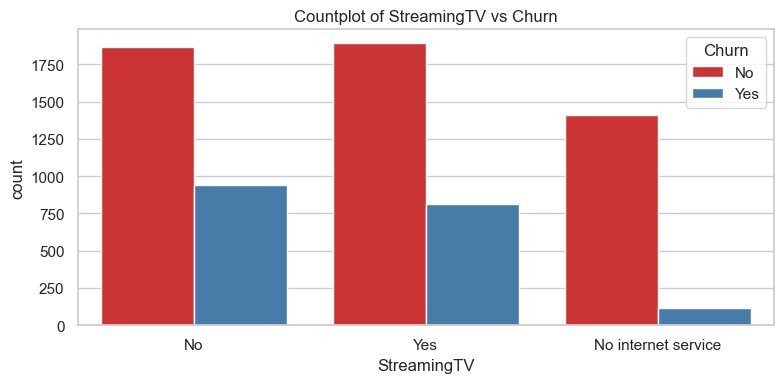

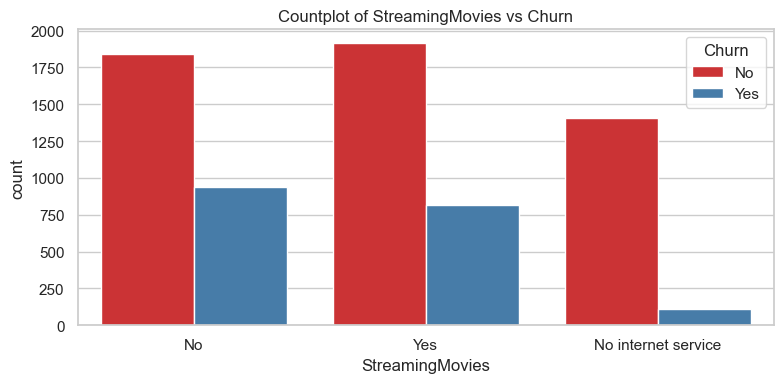

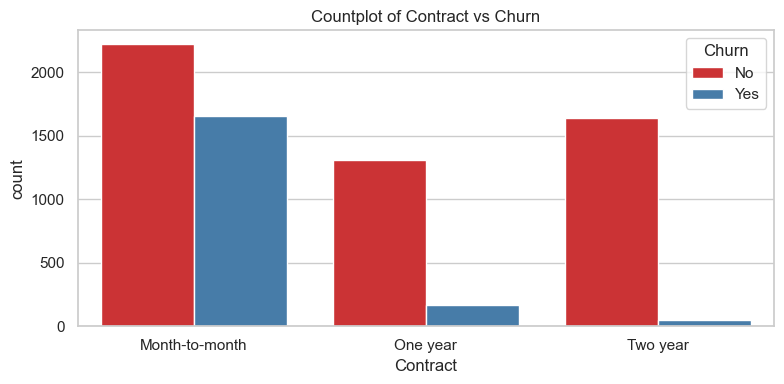

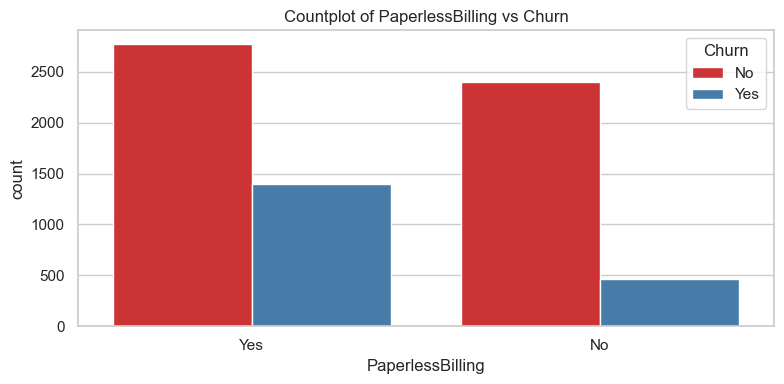

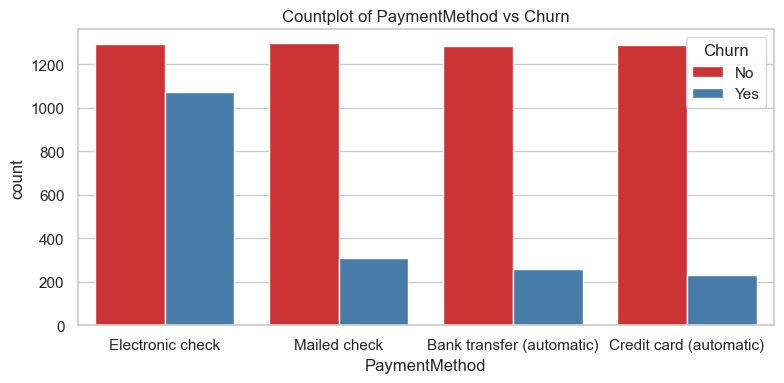

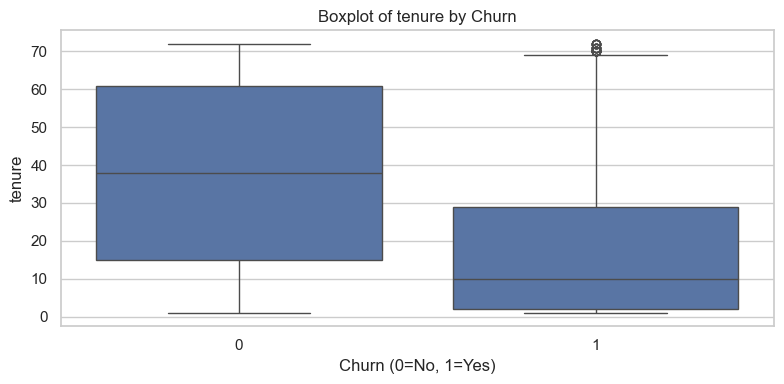

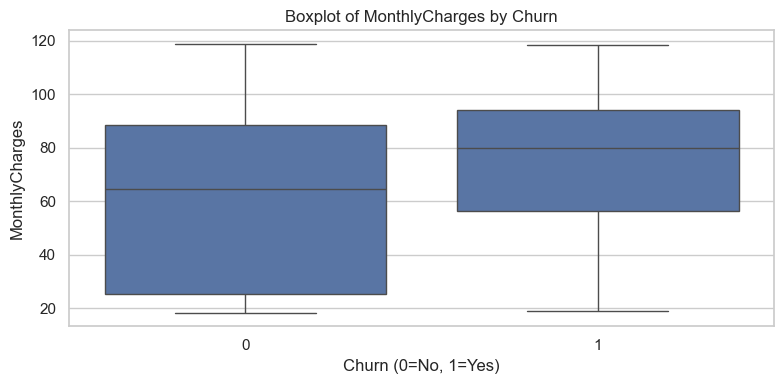

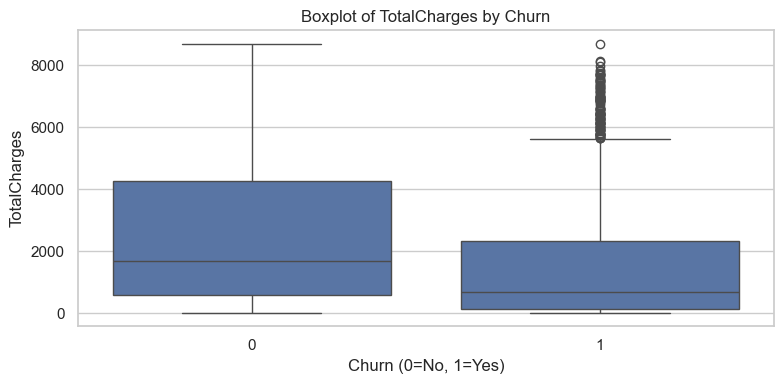

In [7]:
#convert churn to 1 and 0
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

#categorical column
category = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

sns.set(style="whitegrid")

for col in category:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'Countplot of {col} vs Churn')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Boxplot of {col} by Churn')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.tight_layout()
    plt.show()

In [8]:
#drop customerID
df.drop("customerID", axis=1, inplace=True)

#binary column -> 0 and 1
binary = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in binary:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

#multiple category -> one hot encoding, TRUE=1, FALSE=0
multiple = [
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"
]
df = pd.get_dummies(df, columns=multiple)

#boolean to 1 and 0 (TRUE=1, FALSE=0)
boolean = df.select_dtypes(include='bool').columns
df[boolean] = df[boolean].astype(int)

df.to_csv("Telco2.csv", index=False)

print("Telco2.csv done")


Telco2.csv done


In [9]:
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
print(churn_distribution)

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


### **Random Forest**

                                    Feature  Importance
8                              TotalCharges    0.164351
7                            MonthlyCharges    0.148967
4                                    tenure    0.147648
33                  Contract_Month-to-month    0.065547
24                           TechSupport_No    0.032404
0                                    gender    0.027886
15                        OnlineSecurity_No    0.027625
13              InternetService_Fiber optic    0.026824
38           PaymentMethod_Electronic check    0.026019
6                          PaperlessBilling    0.024659
2                                   Partner    0.023308
1                             SeniorCitizen    0.020413
3                                Dependents    0.019433
18                          OnlineBackup_No    0.015973
21                      DeviceProtection_No    0.014261
9                          MultipleLines_No    0.013453
37    PaymentMethod_Credit card (automatic)    0

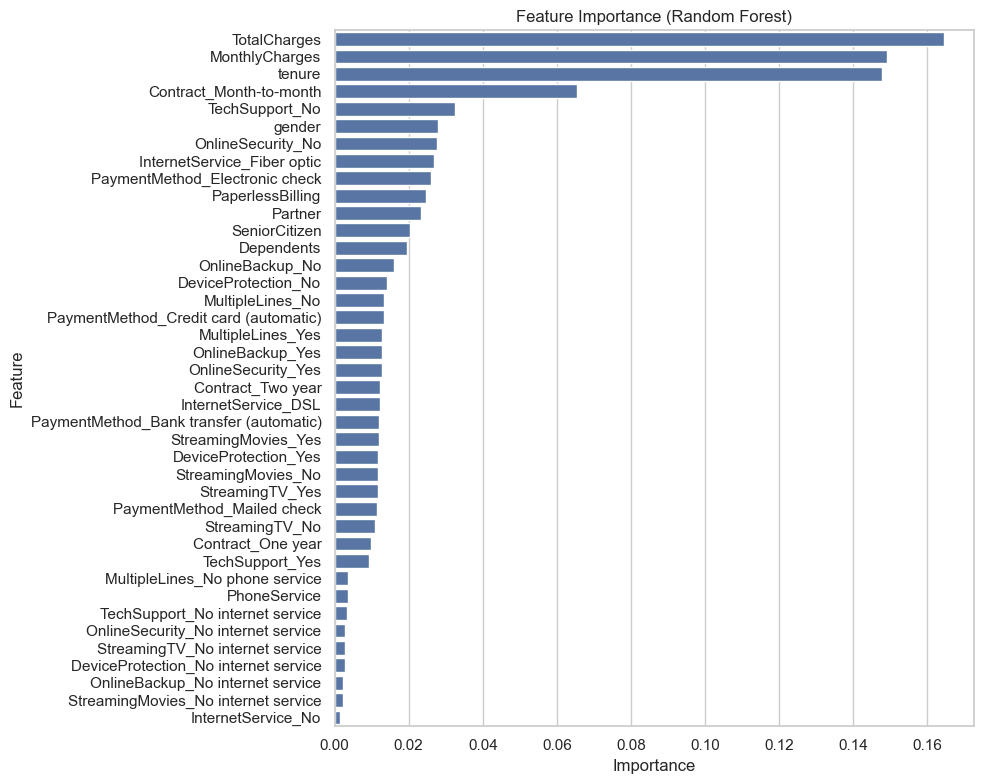

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#churn become target, others become features
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#n_estimators = how many of trees are created
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#feature importances
importance = model.feature_importances_
features = X.columns

#csort by importance
featureImportance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(featureImportance)

#graph
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=featureImportance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



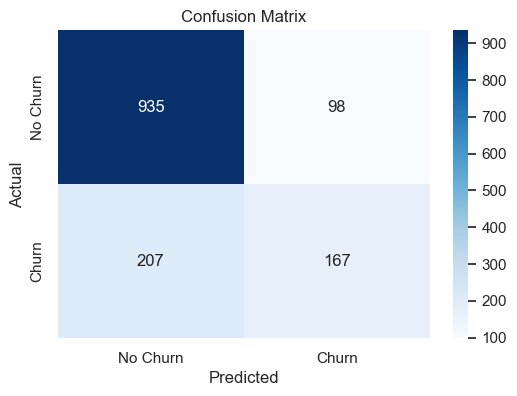

In [11]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

#select feature(X) and target(y)
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features]
y = df['Churn']

#stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#random forest model measurement
model_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    n_jobs=-1,
    random_state=50,
    max_features='sqrt',
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)

#evaluation
accuracy = accuracy_score(y_test, prediction_test)
precision = precision_score(y_test, prediction_test)
recall = recall_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)

print(classification_report(y_test, prediction_test))

#confusion matrix
cm = confusion_matrix(y_test, prediction_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier

#data split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#train Decision Tree model
model_dt_limited = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_dt_limited.fit(X_train, y_train)

#predict & evaluate
y_pred = model_dt_limited.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



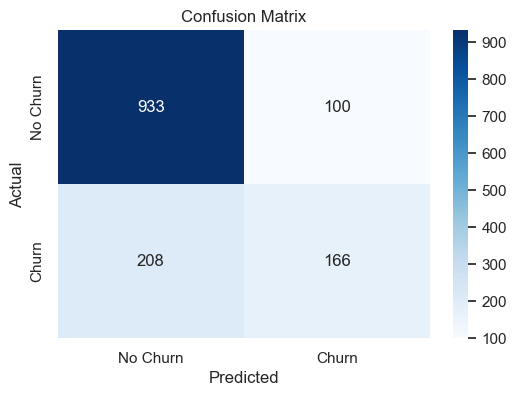

In [13]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **KNN**

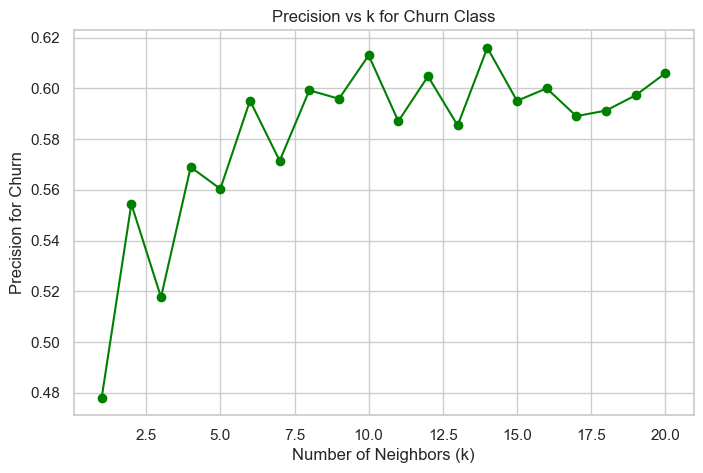

Best k based on precision: 14

Final Model Accuracy: 0.7754

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.91      0.86      1033
       Churn       0.62      0.41      0.49       374

    accuracy                           0.78      1407
   macro avg       0.71      0.66      0.67      1407
weighted avg       0.76      0.78      0.76      1407



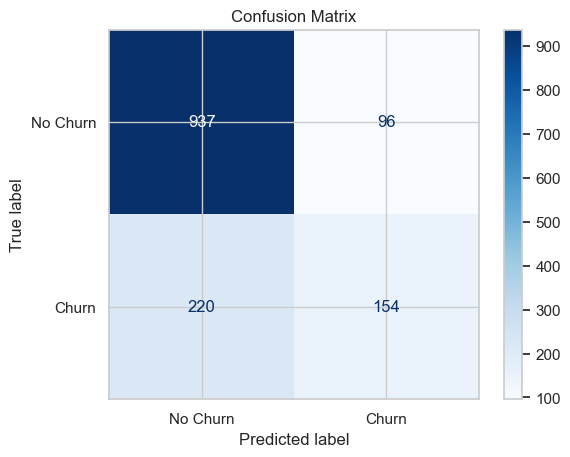

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay


#data split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#scaling: standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#check for which k value has the best performance
k_values = list(range(1, 21))
precision_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

#graph: precision vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, precision_scores, marker='o', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision for Churn')
plt.title('Precision vs k for Churn Class')
plt.grid(True)
plt.show()

best_k = k_values[precision_scores.index(max(precision_scores))]
print(f"Best k based on precision: {best_k}")

#train knn model with best k value
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_final_pred = final_knn.predict(X_test_scaled)

#evaluation metrics
print(f"\nFinal Model Accuracy: {accuracy_score(y_test, y_final_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_final_pred, target_names=['No Churn', 'Churn']))

#confusion matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### **SVM**

In [15]:
from sklearn.svm import SVC
from sklearn import metrics

#scaling: standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#data split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#train SVM model with the best parameters (C=100, gamma=1)
model_svm = SVC(kernel='rbf', C=100, gamma=1, probability=True, random_state=50)
model_svm.fit(X_train, y_train)

#make predictions
train_pred = model_svm.predict(X_train)
test_pred = model_svm.predict(X_test)
y_probs = model_svm.predict_proba(X_test)[:, 1]

#evaluate performance
print("Train Accuracy:", metrics.accuracy_score(y_train, train_pred))
print("Test Accuracy:", metrics.accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))


Train Accuracy: 0.7971555555555555
Test Accuracy: 0.7853589196872779
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



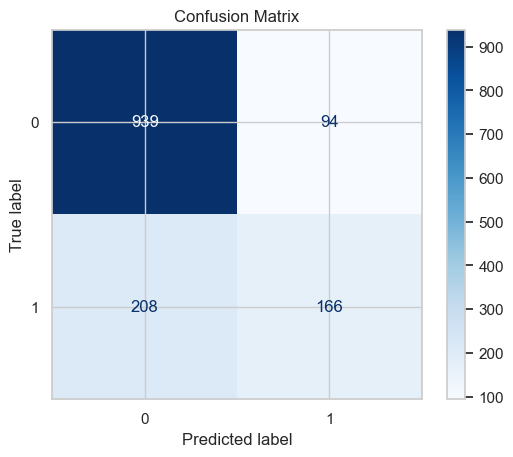

In [16]:
#confusion Matrix
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


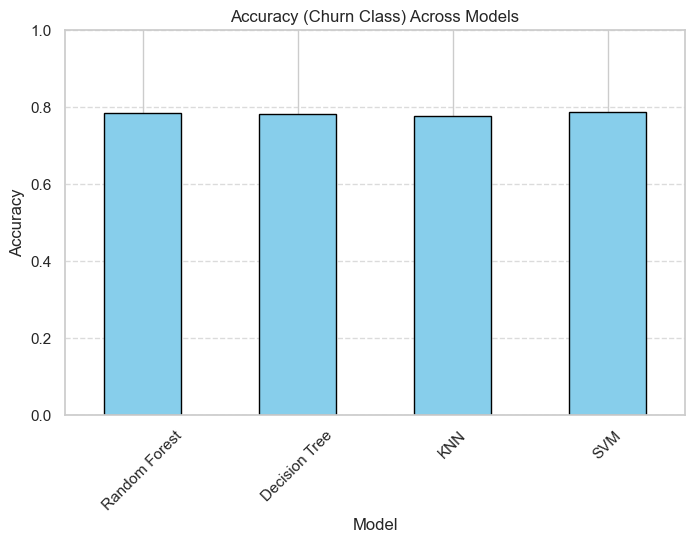

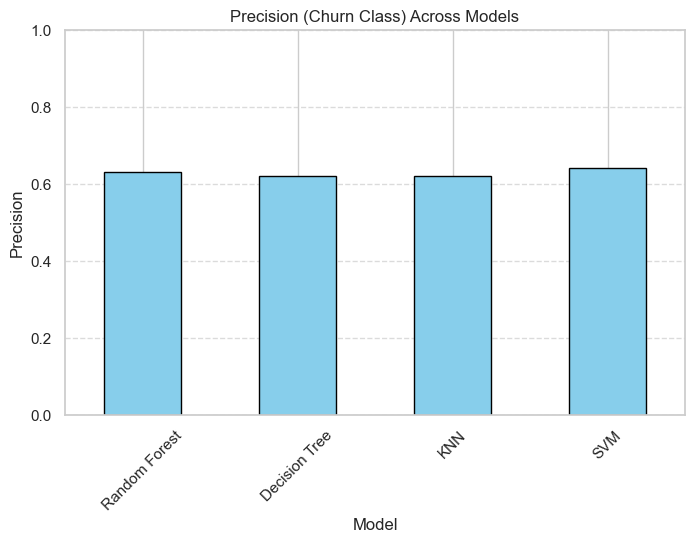

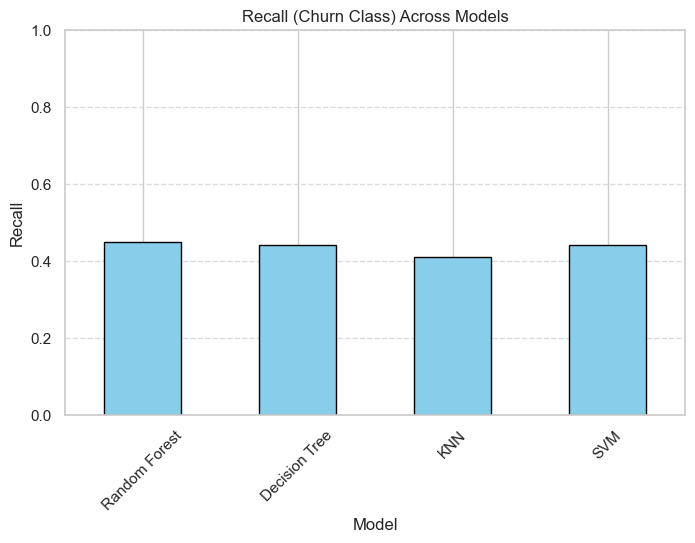

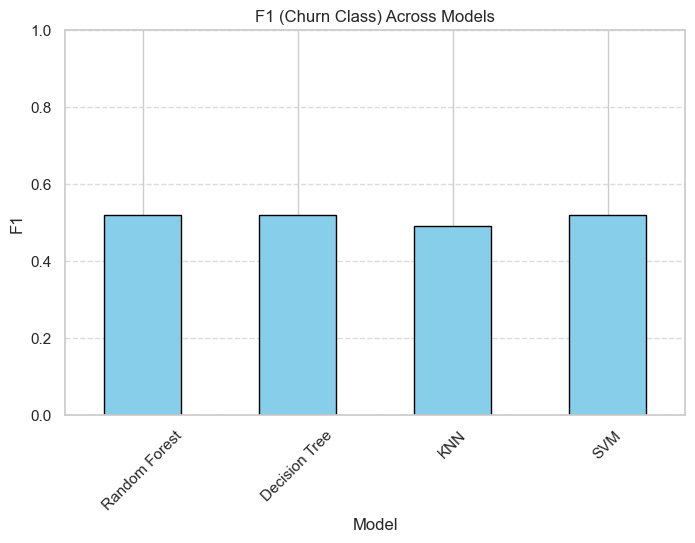

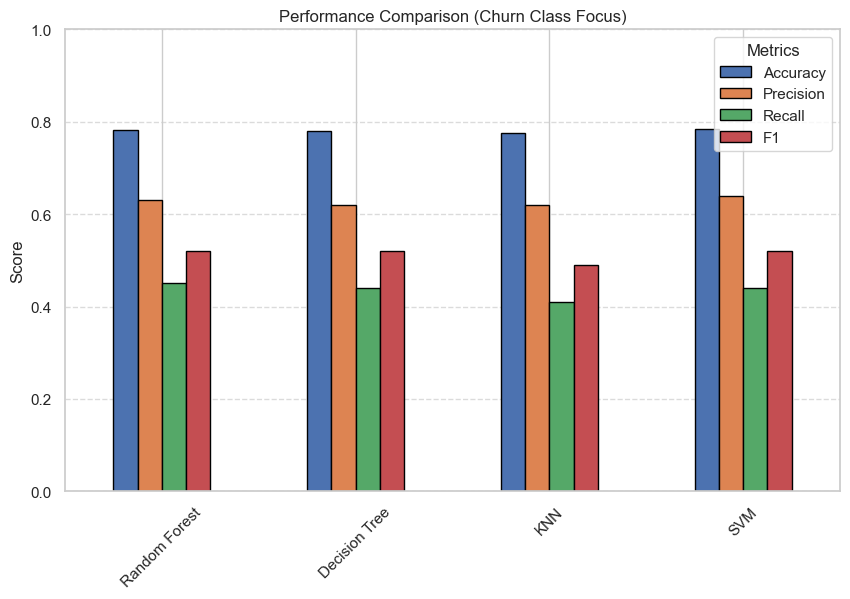


Performance Summary (Churn class only):


,Accuracy,Precision,Recall,F1
Random Forest,0.7832,0.63,0.45,0.52
Decision Tree,0.7811,0.62,0.44,0.52
KNN,0.7754,0.62,0.41,0.49
SVM,0.7854,0.64,0.44,0.52


In [17]:

results = {
    "Random Forest": {
        "Accuracy": 0.7832,
        "Precision": 0.63,
        "Recall": 0.45,
        "F1": 0.52
    },
    "Decision Tree": {
        "Accuracy": 0.7811,
        "Precision": 0.62,
        "Recall": 0.44,
        "F1": 0.52
    },
    "KNN": {
        "Accuracy": 0.7754,
        "Precision": 0.62,
        "Recall": 0.41,
        "F1": 0.49
    },
    "SVM": {
        "Accuracy": 0.7854,
        "Precision": 0.64,
        "Recall": 0.44,
        "F1": 0.52
    }
}

#convert to DataFrame
df_results = pd.DataFrame(results).T

#comparison graphs

metrics = ["Accuracy", "Precision", "Recall", "F1"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    df_results[metric].plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"{metric} (Churn Class) Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

#graph: all metrics together
df_results.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.title("Performance Comparison (Churn Class Focus)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Metrics")
plt.show()

#table
print("\nPerformance Summary (Churn class only):")
display(df_results)
